# 0. Data import

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
df = pd.read_csv('Data Science Salary 2021 to 2023.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L
...,...,...,...,...,...,...,...,...,...
3756,2020,SE,FT,Principal Data Scientist,130000,EUR,148261,DE,M
3757,2020,SE,FT,Data Scientist,80000,EUR,91237,AT,S
3758,2020,SE,FT,Data Science Manager,190200,USD,190200,US,M
3759,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,S


In [ ]:
df.isnull().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary              0
salary_currency     0
salary_in_usd       0
company_location    0
company_size        0
dtype: int64

In [ ]:
filt = df['company_location'] == 'US'
print(df[filt].shape)
print(df[~filt].shape)

(3045, 9)
(716, 9)


In [ ]:
3045/3761

0.8096250997075246

In [ ]:
filt = df['company_location'] == 'US'
df = df[filt]
df = df.reset_index(drop=True)
# Among total 3761 rows 3045 rows are dealing with US occupations

In [ ]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L
3,2023,EN,FT,Applied Scientist,110680,USD,110680,US,L
4,2023,EN,FT,Machine Learning Engineer,163196,USD,163196,US,M
...,...,...,...,...,...,...,...,...,...
3040,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,S
3041,2020,SE,FT,Data Scientist,120000,USD,120000,US,L
3042,2020,SE,FL,Computer Vision Engineer,60000,USD,60000,US,S
3043,2020,SE,FT,Data Science Manager,190200,USD,190200,US,M


In [ ]:
df.corr()

<ipython-input-11-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,work_year,salary,salary_in_usd
work_year,1.000000,-0.032895,0.095889
salary,-0.032895,1.000000,0.200847
salary_in_usd,0.095889,0.200847,1.000000


# 1. Experience level & Salary
EN (Entry-Level), EX (Experienced), MI (Mid-Level), SE (Senior)

In [ ]:
df['experience_level'].value_counts()

SE    2264
MI     500
EN     183
EX      98
Name: experience_level, dtype: int64

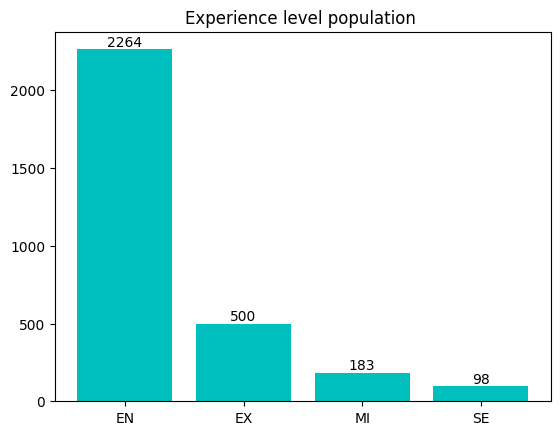

In [ ]:
plt.bar(df['experience_level'].unique(),df['experience_level'].value_counts(),color='c')

# 직종 별 인원 수 작성
for index, value in enumerate(df['experience_level'].value_counts()):
    plt.text(index, value, value, ha='center', va='bottom')
plt.title('Experience level population ')

plt.show()

In [ ]:
2264 / (2264 + 500 + 183 + 98)

0.7435139573070607

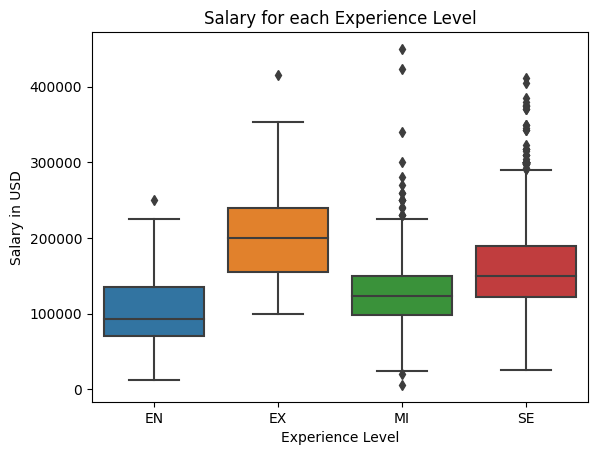

In [ ]:
# sns boxplot : 잡 레벨 별 연봉 분포도

sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary for each Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

In [ ]:
avg = df.groupby("experience_level")["salary_in_usd"].mean()
avg

experience_level
EN    102400.639344
EX    207445.520408
MI    127776.604000
SE    158691.223057
Name: salary_in_usd, dtype: float64

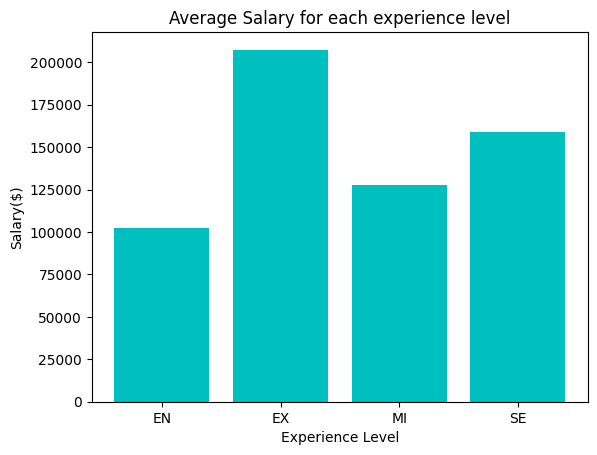

In [ ]:
# Salary for each experience level (2) - avg

plt.bar(df['experience_level'].unique(),avg,color='c')
plt.title("Average Salary for each experience level")
plt.xlabel("Experience Level")
plt.ylabel("Salary($)")
plt.show()

# 2. Job title

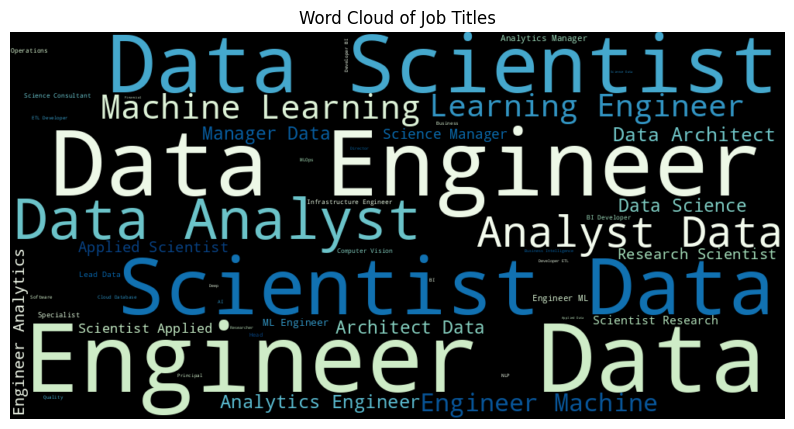

In [ ]:
from wordcloud import WordCloud
# Generate a word cloud for job titles
wordcloud = WordCloud(width=1000, height=500, background_color='black',colormap='GnBu', max_words=80).generate(' '.join(df['job_title']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Titles')
# plt.show()
plt.savefig('WordCloudOfJobTitles.pdf')

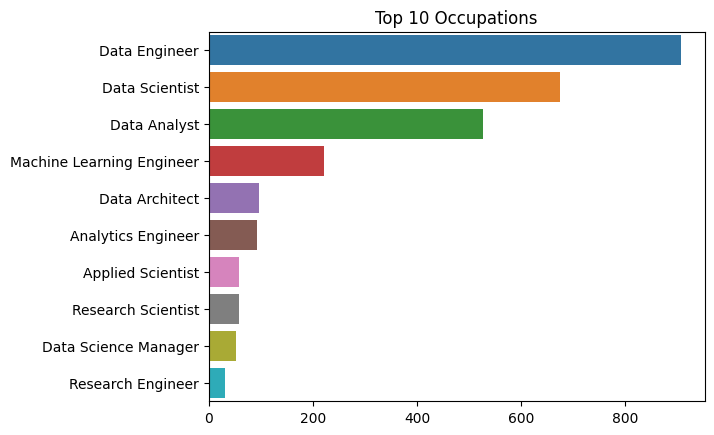

In [ ]:
  mode_job = df.job_title.value_counts()[:10]
  sns.barplot(x=mode_job.values, y=mode_job.index, orient="h")
  plt.title('Top 10 Occupations')
  plt.show()

In [ ]:
 # Insight: Average Salary by Job Title
average_salary_by_title = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(5)
print("Average Salary by Job Title:\n", average_salary_by_title)

Average Salary by Job Title:
 job_title
Data Analytics Lead         405000.0
Data Science Tech Lead      375000.0
Director of Data Science    294375.0
Principal Data Scientist    255500.0
Cloud Data Architect        250000.0
Name: salary_in_usd, dtype: float64


<Axes: >

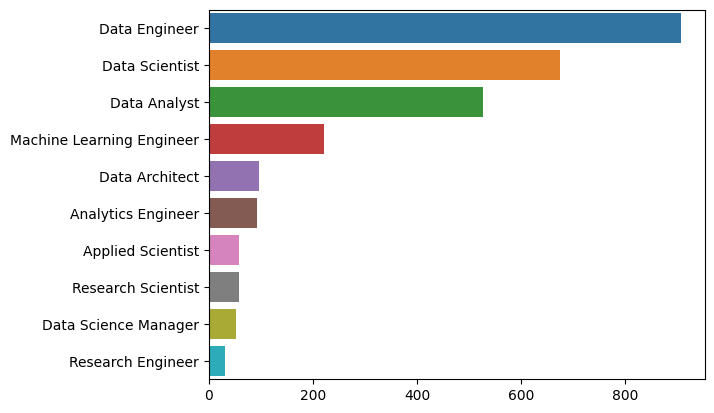

In [ ]:
jobs_top10 = df.job_title.value_counts()[:10]
sns.barplot(x=jobs_top10.values, y=jobs_top10.index, orient="h")

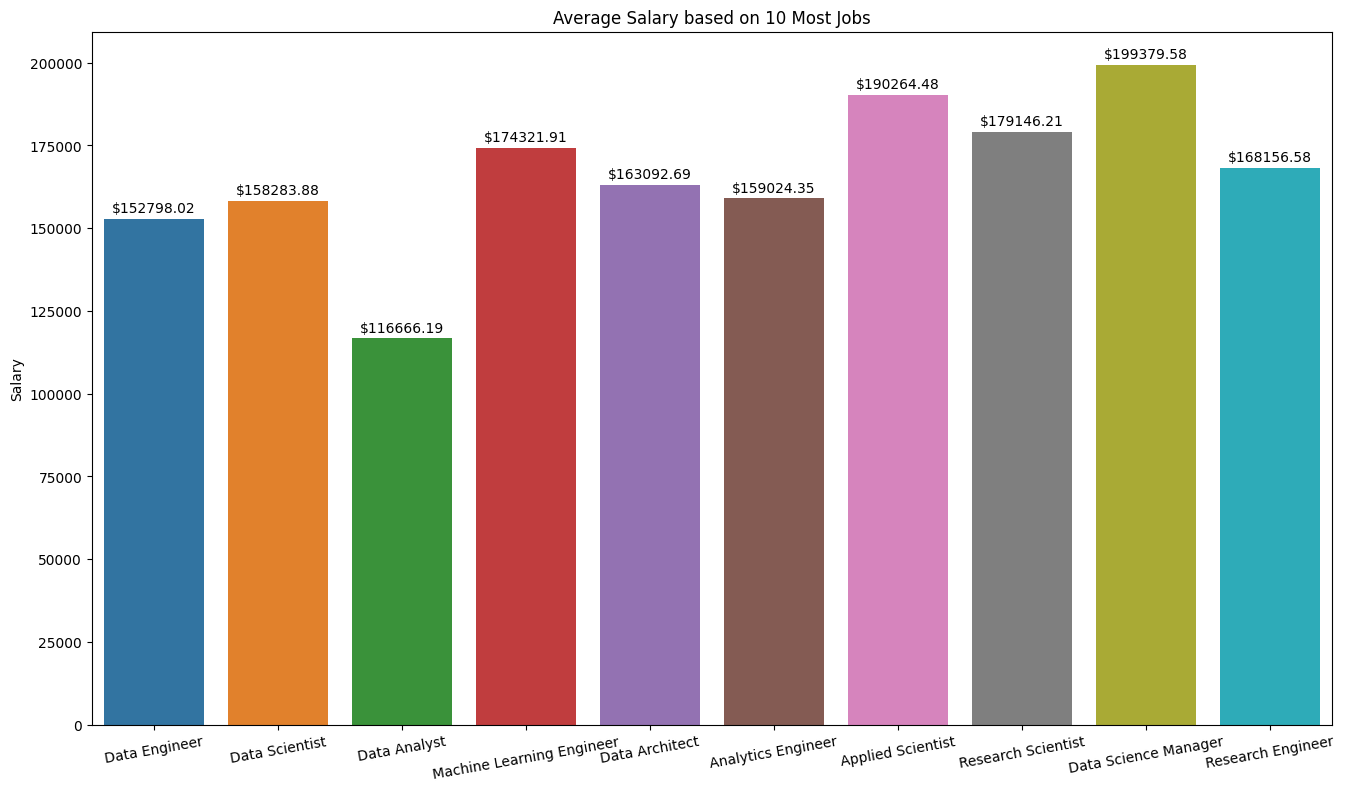

In [ ]:
plt.figure(figsize=(16,9))

jobs_top10_salary = df.groupby("job_title")["salary_in_usd"].mean() \
                    .loc[jobs_top10.index]

ax = sns.barplot(y=jobs_top10_salary.values, x=jobs_top10_salary.index)
for idx, values in enumerate(jobs_top10_salary.values):
    ax.text(idx, values + 1000, f"${values:.2f}", ha='center', va='bottom', fontsize=10)

plt.title("Average Salary based on 10 Most Jobs")
plt.ylabel("Salary")

ax.set_xticklabels(jobs_top10_salary.index, rotation=10)
plt.show()

In [ ]:
# 10 highest salary

In [ ]:
# plt.figure(figsize=(16, 9))

# salary_jobs = df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending=False)

# ax = sns.barplot(y=salary_jobs.values, x=salary_jobs.index)
# for idx, values in enumerate(salary_jobs.values):
#     ax.text(idx, values + 1000, f"${values:.2f}", ha='center', va='bottom', fontsize=10)

# plt.title("10 most Expensive Salaries")
# plt.ylabel("Salary")

# ax.set_xticklabels(salary_jobs.index, rotation=10)
# plt.show()

ValueError: ignored

<Figure size 1600x900 with 1 Axes>

# Prediction (0) - Linear Regression with basic data

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

x = df['']
y = [[4], [8], [23], [1], [-2]]

LR = LinearRegression() # 모델 생성
LR.fit(x,y) # 모델 학습

In [ ]:
import numpy as np

x = df['work_year'].to_numpy().reshape(-1, 1)
y = df['salary_in_usd'].to_numpy().reshape(-1, 1)

print(x.shape)
print(y.shape)

(3045, 1)
(3045, 1)


In [ ]:
LR = LinearRegression() # 모델 생성
LR.fit(x,y) # 모델 학습

LinearRegression()

In [ ]:
print(LR.coef_, LR.intercept_)

[[8760.26653144]] [-17565517.22773623]


In [ ]:
import matplotlib.pyplot as plt

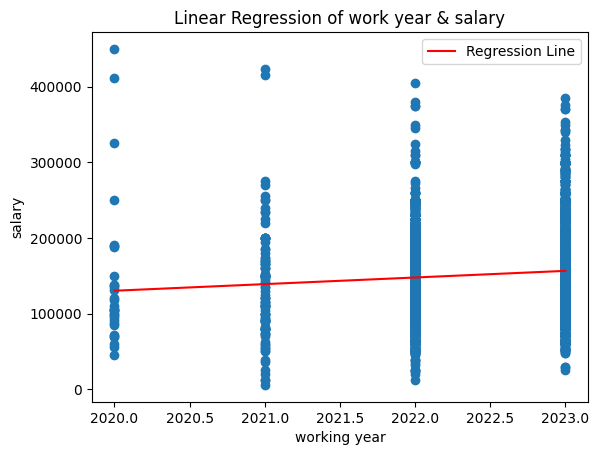

In [ ]:
# 회귀 선 시각화
plt.scatter(x,y)
plt.plot(x, LR.predict(x), label='Regression Line', color='red')

plt.xlabel('working year')
plt.ylabel('salary')
plt.legend()
plt.title('Linear Regression of work year & salary')
plt.show()

원핫인코딩

In [ ]:
# 변수 범주화
df_one_hot = pd.get_dummies(df, columns=['experience_level', 'employment_type', 'job_title', 'company_location', 'company_size'])

# 불필요한 컬럼 삭제
df_one_hot.drop(['salary_currency'], axis=1, inplace=True)

X = df_one_hot.drop(['salary', 'salary_in_usd'], axis=1)
y = df_one_hot['salary_in_usd']

LR.fit(X,y)
print(LR.coef_, LR.intercept_)

[ 4.90656755e+03 -4.44800721e+16 -4.44800721e+16 -4.44800721e+16
 -4.44800721e+16  9.15201350e+17  9.15201350e+17  9.15201350e+17
  9.15201350e+17  1.85143801e+17  1.85143801e+17  1.85143801e+17
  1.85143801e+17  1.85143801e+17  1.85143801e+17  1.85143801e+17
  1.85143801e+17  1.85143801e+17  1.85143801e+17  1.85143801e+17
  1.85143801e+17  1.85143801e+17  1.85143801e+17  1.85143801e+17
  1.85143801e+17  1.85143801e+17  1.85143801e+17  1.85143801e+17
  1.85143801e+17  1.85143801e+17  1.85143801e+17  1.85143801e+17
  1.85143801e+17  1.85143801e+17  1.85143801e+17  1.85143801e+17
  1.85143801e+17  1.85143801e+17  1.85143801e+17  1.85143801e+17
  1.85143801e+17  1.85143801e+17  1.85143801e+17  1.85143801e+17
  1.85143801e+17  1.85143801e+17  1.85143801e+17  1.85143801e+17
  1.85143801e+17  1.85143801e+17  1.85143801e+17  1.85143801e+17
  1.85143801e+17  1.85143801e+17  1.85143801e+17  1.85143801e+17
  1.85143801e+17  1.85143801e+17  1.85143801e+17  1.85143801e+17
  1.85143801e+17  1.85143

# 3. Prediction(1) - XGBoost

In [ ]:
pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# 변수 범주화
df_one_hot = pd.get_dummies(df, columns=['experience_level', 'employment_type', 'job_title', 'company_location', 'company_size'])

# 불필요한 컬럼 삭제
df_one_hot.drop(['salary_currency'], axis=1, inplace=True)

X = df_one_hot.drop(['salary', 'salary_in_usd'], axis=1)
y = df_one_hot['salary_in_usd']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [ ]:
y_pred = xg_reg.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

RMSE: 47160.00192894963
R2 Score: 0.2590938935430026


# 3. Prediction (2)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 컬럼 범주화
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

# 라벨 인코딩
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardization
standard_scaler = StandardScaler()
df_standardized = standard_scaler.fit_transform(df)
df = pd.DataFrame(df_standardized, columns=df.columns)

In [ ]:
# 피쳐 / 타겟 데이터
X = df.drop(['salary', 'salary_currency', 'salary_in_usd'], axis=1)  # 피쳐 / x값이 됨
y = df['salary_in_usd']  # 타겟변수

In [ ]:
# X = df[['work_year', 'experience_level', 'company_size']]
# y = df['salary_in_usd']

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardization
standard_scaler = StandardScaler()
df_standardized = standard_scaler.fit_transform(df)
df = pd.DataFrame(df_standardized, columns=df.columns)

In [ ]:
from sklearn.model_selection import train_test_split

# train / test set으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# for문 돌리기 위한 모델들 리스트에 넣기
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42))
]

# 각 모델 별 결과 확인하기
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R-squared: {r2:.2f}")
    print("===================")

Model: Linear Regression
Mean Squared Error: 0.97
Root Mean Squared Error: 0.99
Mean Absolute Error: 0.76
R-squared: 0.04
Model: Decision Tree
Mean Squared Error: 0.85
Root Mean Squared Error: 0.92
Mean Absolute Error: 0.72
R-squared: 0.15
Model: Random Forest
Mean Squared Error: 0.86
Root Mean Squared Error: 0.93
Mean Absolute Error: 0.72
R-squared: 0.15


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# # 변수 범주화
# df_one_hot = pd.get_dummies(df, columns=['experience_level', 'employment_type', 'job_title', 'company_location', 'company_size'])

# # # 불필요한 컬럼 삭제
# df_one_hot.drop(['salary_currency'], axis=1, inplace=True)

X = df.drop(['salary', 'salary_currency', 'salary_in_usd'], axis=1)  # Features
y = df['salary_in_usd']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42))
]

# Iterate through the models
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R-squared: {r2:.2f}")
    print("===================")

Model: Linear Regression
Mean Squared Error: 0.89
Root Mean Squared Error: 0.94
Mean Absolute Error: 0.75
R-squared: 0.07
Model: Decision Tree
Mean Squared Error: 0.77
Root Mean Squared Error: 0.88
Mean Absolute Error: 0.68
R-squared: 0.19
Model: Random Forest
Mean Squared Error: 0.75
Root Mean Squared Error: 0.87
Mean Absolute Error: 0.68
R-squared: 0.21
